In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import ElasticNetCV,LassoCV,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate,train_test_split
from ITMO_FS.filters.univariate import f_ratio_measure,pearson_corr,spearman_corr,kendall_corr
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import RobustScaler,StandardScaler,PowerTransformer
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
import relieff


import seaborn as sns
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [2]:
molecular_des = pd.read_excel('../../data/Molecular_Descriptor.xlsx',engine='openpyxl',index_col=0,)
molecular_des.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,...,439.218115,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,...,467.249415,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,...,463.181729,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,...,467.249415,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,...,461.202465,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174


In [3]:
era_activity = pd.read_excel('../../data/ERα_activity.xlsx',engine='openpyxl',index_col=0,)
era_activity.head()

,IC50_nM,pIC50
SMILES,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,2.5,8.602060
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,7.5,8.124939
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,3.1,8.508638
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,3.9,8.408935
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,7.4,8.130768


In [4]:
def constant_feature_detect(data,threshold=0.98):
    """ detect features that show the same value for the 
    majority/all of the observations (constant/quasi-constant features)
    
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable as constant
        
    Returns
    -------
    list of variables names
    """
    
    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() / np.float(
                      len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),' variables are found to be almost constant') 
    print(quasi_constant_feature)
    return quasi_constant_feature

In [5]:
# all_feature = molecular_des.columns
quasi_constant_feature=constant_feature_detect(data=molecular_des,threshold=0.9)
molecular_des.drop(labels=quasi_constant_feature,axis=1,inplace=True)

367  variables are found to be almost constant
['nAcid', 'nB', 'nP', 'nCl', 'nBr', 'nI', 'nBondsT', 'nBondsQ', 'C1SP1', 'C2SP1', 'SCH-3', 'SCH-4', 'VCH-3', 'VCH-4', 'nwHBd', 'nHdNH', 'nHsSH', 'nHsNH2', 'nHaaNH', 'nHsNH3p', 'nHssNH2p', 'nHsssNHp', 'nHtCH', 'nHdCH2', 'nHCHnX', 'nHmisc', 'nsLi', 'nssBe', 'nssssBem', 'nsBH2', 'nssBH', 'nsssB', 'nssssBm', 'ndCH2', 'ntCH', 'nddC', 'ntsC', 'nsNH3p', 'nsNH2', 'nssNH2p', 'ndNH', 'naaNH', 'ntN', 'nsssNHp', 'ndsN', 'nddsN', 'naasN', 'nssssNp', 'naOm', 'nsOm', 'nsSiH3', 'nssSiH2', 'nsssSiH', 'nssssSi', 'nsPH2', 'nssPH', 'nsssP', 'ndsssP', 'nddsP', 'nsssssP', 'nsSH', 'ndS', 'naaS', 'ndssS', 'nddssS', 'nssssssS', 'nSm', 'nsCl', 'nsGeH3', 'nssGeH2', 'nsssGeH', 'nssssGe', 'nsAsH2', 'nssAsH', 'nsssAs', 'ndsssAs', 'nddsAs', 'nsssssAs', 'nsSeH', 'ndSe', 'nssSe', 'naaSe', 'ndssSe', 'nssssssSe', 'nddssSe', 'nsBr', 'nsSnH3', 'nssSnH2', 'nsssSnH', 'nssssSn', 'nsI', 'nsPbH3', 'nssPbH2', 'nsssPbH', 'nssssPb', 'SwHBd', 'SHdNH', 'SHsSH', 'SHsNH2', 'SHaaNH', 'SHs

In [6]:
#### 根据方差删除
molecular_des = molecular_des.loc[:,molecular_des.std() >= 0.05]
molecular_des.shape

(1974, 341)

In [47]:
molecular_des

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,VAdjMat,MW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,26,...,5.954196,439.218115,64.771680,15.471445,8.858910,3.406628,3011,47,4.666,166
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,28,...,6.044394,467.249415,68.960024,15.486947,8.863774,3.406648,3516,54,5.804,174
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,27,...,6.044394,463.181729,68.748923,18.011114,11.390412,3.406644,3542,52,2.964,176
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,28,...,6.044394,467.249415,68.883696,15.468365,8.857943,3.406624,3594,50,6.015,174
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,28,...,6.044394,461.202465,68.883696,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)c2)c1,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,34,...,6.426265,598.166139,88.709996,25.470481,21.946991,0.000000,7121,70,2.526,236
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\c5cc(O)cc(O)c5)c4)c6ccc(O)cc6,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,6.357552,570.134839,84.662088,24.928962,21.405589,0.000000,6171,66,1.884,228
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c5cc(O)cc(O)c5)cc4)c6ccc(O)cc6,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,6.357552,570.134839,84.660642,24.923083,21.400883,0.000000,6421,66,1.884,228


In [96]:
molecluar_des_hanyi = pd.read_csv('../重构分子描述符含义解释.csv',index_col=0,)
molecluar_des_hanyi.head()
molecluar_des_hanyi = molecluar_des_hanyi.fillna(0)
final_remove_column = []
for columns in molecluar_des_hanyi['Descriptor']:
    if columns == 0 or  len(columns.split(',')) < 2:
        continue
    cur_columns = set(columns.strip().split(',')).intersection(set(list(molecular_des.columns)))
    cur_calss = molecular_des.loc[:,list(cur_columns)]
    cor_matrix = cur_calss.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    final_remove_column.extend(to_drop)
len(final_remove_column)

125

In [98]:
# # molecular_des.loc[:,final_remove_column].corr().abs()
molecular_des_corr_del = molecular_des.loc[:,final_remove_column]
# cor_matrix = molecular_des_corr_del.corr().abs()
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
# molecular_des_corr_del = molecular_des_corr_del.drop(to_drop, axis=1)
molecular_des_corr_del

,maxaaN,SHaaCH,maxHAvin,minssO,nHaaCH,maxsF,maxssNH,minssS,maxHBint8,MAXDN,...,ATSp1,ATSp5,ATSm5,ATSm2,ATSm3,ATSc2,nHBAcc2,Kier2,Kier3,nHBDon
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0.0,3.309231,0.000000,6.050188,7,0.0,0.0,-1.331303,0.0,1.979451,...,2469.977567,3792.779760,58.060335,40.498576,58.166514,-0.217040,4,10.950521,5.742188,1
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0.0,3.262275,0.000000,6.083246,7,0.0,0.0,-1.378628,0.0,2.026776,...,2679.488262,4154.384741,60.060335,42.498576,60.166514,-0.217040,4,12.300800,6.611570,1
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0.0,5.544792,0.000000,6.020424,11,0.0,0.0,-1.608354,0.0,2.256502,...,2576.569862,3993.734054,60.392427,42.830668,61.830698,-0.236031,5,11.823145,6.415683,2
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0.0,3.283496,0.000000,6.071897,7,0.0,0.0,-1.350874,0.0,1.999022,...,2596.316352,3850.190106,57.728243,42.498576,60.166514,-0.216970,4,12.300800,6.816568,1
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0.0,5.563573,0.000000,6.046045,12,0.0,0.0,-1.449689,0.0,2.097837,...,2561.845107,3806.120673,57.728243,42.498576,60.166514,-0.215099,4,12.300800,6.816568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)c2)c1,0.0,8.348965,0.536718,5.340113,15,0.0,0.0,0.000000,0.0,6.349472,...,3435.707126,6237.629855,89.083040,60.327811,82.978326,-0.410072,8,14.408571,7.605251,2
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\c5cc(O)cc(O)c5)c4)c6ccc(O)cc6,0.0,8.459235,0.550607,5.760169,15,0.0,0.0,0.000000,0.0,6.367517,...,3297.276571,5948.533703,85.083040,57.663627,80.978326,-0.270926,8,13.157439,7.130864,4
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c5cc(O)cc(O)c5)cc4)c6ccc(O)cc6,0.0,8.469362,0.541875,5.702148,15,0.0,0.0,0.000000,0.0,6.317102,...,3275.017812,5804.010590,83.750948,57.663627,80.978326,-0.270925,8,13.157439,7.130864,4


<AxesSubplot:>

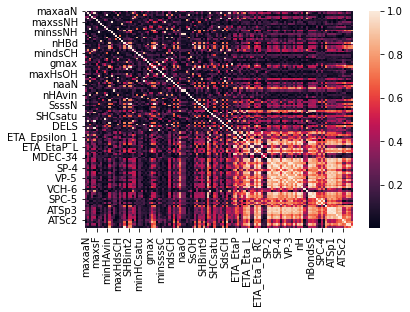

In [99]:
sns.heatmap(molecular_des_corr_del.corr().abs())

In [100]:
all_data = molecular_des_corr_del.join(era_activity)
all_data.head()

,maxaaN,SHaaCH,maxHAvin,minssO,nHaaCH,maxsF,maxssNH,minssS,maxHBint8,MAXDN,...,ATSm5,ATSm2,ATSm3,ATSc2,nHBAcc2,Kier2,Kier3,nHBDon,IC50_nM,pIC50
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0.0,3.309231,0.0,6.050188,7,0.0,0.0,-1.331303,0.0,1.979451,...,58.060335,40.498576,58.166514,-0.217040,4,10.950521,5.742188,1,2.5,8.602060
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0.0,3.262275,0.0,6.083246,7,0.0,0.0,-1.378628,0.0,2.026776,...,60.060335,42.498576,60.166514,-0.217040,4,12.300800,6.611570,1,7.5,8.124939
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0.0,5.544792,0.0,6.020424,11,0.0,0.0,-1.608354,0.0,2.256502,...,60.392427,42.830668,61.830698,-0.236031,5,11.823145,6.415683,2,3.1,8.508638
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0.0,3.283496,0.0,6.071897,7,0.0,0.0,-1.350874,0.0,1.999022,...,57.728243,42.498576,60.166514,-0.216970,4,12.300800,6.816568,1,3.9,8.408935
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0.0,5.563573,0.0,6.046045,12,0.0,0.0,-1.449689,0.0,2.097837,...,57.728243,42.498576,60.166514,-0.215099,4,12.300800,6.816568,1,7.4,8.130768


In [101]:
X = all_data.iloc[:,:-2].values
y = all_data.iloc[:,-1].values
X.shape

(1974, 125)

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNet,Lasso
from deepforest import CascadeForestRegressor

In [103]:
pearson_score = pearson_corr(X,y)
pearson_importance = np.abs(pearson_score) / np.sum(np.abs(pearson_score))
# pearson_importance
pearson_rank = np.argsort(-1 * pearson_importance)
np.argsort(-1 * pearson_importance)

array([ 29,  39,  22,  92,  36,  63,   4, 113, 115,  94,  67,  95, 114,
        98, 116,  87,  97,  96,  88, 104,  86,  90,  58,  81, 105,  99,
        93,  85,  50, 101,   1,  19,  89, 100,  75,  59,  42,   0,  54,
        37, 107,  33,  79,  74, 118, 119,  91,  76,  45,  44,  46,  13,
        72, 122,  57, 106,   6,  71,  12, 117,  41,  23, 103,  70, 109,
         3, 111,  53, 102, 123,  80, 110, 108,  78,  21,  32, 112,  77,
         7,  82,  24,  69,   5,  64,  17, 124,  18,  47,  25,  20,  61,
        56,  68,  15,  73,  30,  83,  65, 120,  16,  84,  31,  48, 121,
        10,   2,  26,  34,  27,  40,  52,  14,  60,  66,  62,  28,  35,
         9,   8,  38,  11,  55,  43,  51,  49])

In [104]:
###划分数据集###
X_train_df, X_test_df= train_test_split(molecular_des,test_size=0.3, random_state=56)
train_df = X_train_df.join(era_activity)
test_df = X_test_df.join(era_activity)
X_train = train_df.iloc[:,:-2].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-2].values
y_test = test_df.iloc[:,-1].values


rs = StandardScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)
X_test = rs.transform(X_test)


X_train_filter = X_train[:,pearson_rank[:20]]
X_test_filter = X_test[:,pearson_rank[:20]]

names = ["KNeighborsRegressor", "RBF SVR",
         "RandomForestRegressor","GradientBoostingRegressor", "AdaBoostRegressor","CascadeForestRegressor","ElasticNet"]

classifiers = [
    KNeighborsRegressor(),
    SVR(kernel="rbf"),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=200),
    AdaBoostRegressor(),
    CascadeForestRegressor(),
    ElasticNet()
    ]


regressor_df = pd.DataFrame(index = names,columns=['MSE','R2'])

for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train_filter, y_train)
    y_pred = clf.predict(X_test_filter)
    MSE = mean_absolute_error(y_pred,y_test)
    R2 = r2_score(y_test,y_pred)
    regressor_df.loc[name]['MSE']=MSE
    regressor_df.loc[name]['R2'] = R2

regressor_df

---start	KNeighborsRegressor	----
---start	RBF SVR	----
---start	RandomForestRegressor	----
---start	GradientBoostingRegressor	----
---start	AdaBoostRegressor	----
---start	CascadeForestRegressor	----
[2021-10-15 02:43:11.725] Start to fit the model:
[2021-10-15 02:43:11.725] Fitting cascade layer = 0 
[2021-10-15 02:43:12.765] layer = 0  | Val MSE = 0.66531 | Elapsed = 1.040 s
[2021-10-15 02:43:12.769] Fitting cascade layer = 1 
[2021-10-15 02:43:13.872] layer = 1  | Val MSE = 0.60086 | Elapsed = 1.103 s
[2021-10-15 02:43:13.875] Fitting cascade layer = 2 
[2021-10-15 02:43:14.975] layer = 2  | Val MSE = 0.62598 | Elapsed = 1.100 s
[2021-10-15 02:43:14.975] Early stopping counter: 1 out of 2
[2021-10-15 02:43:14.978] Fitting cascade layer = 3 
[2021-10-15 02:43:16.086] layer = 3  | Val MSE = 0.63512 | Elapsed = 1.107 s
[2021-10-15 02:43:16.086] Early stopping counter: 2 out of 2
[2021-10-15 02:43:16.086] Handling early stopping
[2021-10-15 02:43:16.088] The optimal number of layers: 2

,MSE,R2
KNeighborsRegressor,0.636452,0.636962
RBF SVR,0.647578,0.636453
RandomForestRegressor,0.602557,0.685028
GradientBoostingRegressor,0.650268,0.647056
AdaBoostRegressor,0.923527,0.376081
CascadeForestRegressor,0.550409,0.731825
ElasticNet,1.15594,0.039913


In [105]:
#############   pearson_rank
print(regressor_df['MSE'].mean())
print(regressor_df['R2'].mean())

0.7381045040978637
0.5361880679888655


In [ ]:
def distcorr(X, Y):
    """ Compute the distance correlation function
    
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

distcorr_list = []
for i in range(X.shape[1]):
    distcorr_list.append(distcorr(X[:,i],y))
    
distcorr_list

In [108]:
distcorr_importance = np.abs(distcorr_list) / np.sum(np.abs(distcorr_list))
distcorr_importance
dist_corr_rank = np.argsort(-1 * distcorr_importance)
dist_corr_rank
# dist_corr_rank = np.argsort(-1 * abs(np.array(distcorr_list)))
# dist_corr_rank

array([ 29,  36, 116, 104, 115,  99,  22, 113,  92,  97,  81, 105,  85,
        93,  88, 101,  89,  50, 114,  76,  96,  19,  39,  63,   4,  67,
       100,  95,  94,  87,  86,  33,  98,  75,  90, 107, 122,  54,  79,
        91,  58,   1, 118, 123, 111,  57, 117, 106,  74, 119, 109,  42,
        70,  37,  72,  59,  53,   0,  41,  44,  71, 112,  21,  32,  23,
        12,   6,  45,  46,  13,  78,  77, 103,  82, 124,  34,  80,  30,
        18,   3, 110,  69, 120, 108,  68, 102,   7, 121,  17,  73,  52,
        64,  61,  20,  11,  62,  84,  56,  31,  24,  66,  43,   5,  26,
        83,  47,  60,  49,   9,  14,  28,  25,  38,  27,  40,  16,  65,
        48,  10,   2,  15,  51,   8,  35,  55])

In [109]:
###划分数据集###
X_train_df, X_test_df= train_test_split(molecular_des,test_size=0.3, random_state=56)
train_df = X_train_df.join(era_activity)
test_df = X_test_df.join(era_activity)
X_train = train_df.iloc[:,:-2].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-2].values
y_test = test_df.iloc[:,-1].values


rs = StandardScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)
X_test = rs.transform(X_test)


X_train_filter = X_train[:,dist_corr_rank[:20]]
X_test_filter = X_test[:,dist_corr_rank[:20]]

names = ["KNeighborsRegressor", "RBF SVR",
         "RandomForestRegressor","GradientBoostingRegressor", "AdaBoostRegressor","CascadeForestRegressor","ElasticNet"]

classifiers = [
    KNeighborsRegressor(),
    SVR(kernel="rbf"),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=200),
    AdaBoostRegressor(),
    CascadeForestRegressor(),
    ElasticNet()
    ]


regressor_df = pd.DataFrame(index = names,columns=['MSE','R2'])

for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train_filter, y_train)
    y_pred = clf.predict(X_test_filter)
    MSE = mean_absolute_error(y_pred,y_test)
    R2 = r2_score(y_test,y_pred)
    regressor_df.loc[name]['MSE']=MSE
    regressor_df.loc[name]['R2'] = R2

regressor_df

---start	KNeighborsRegressor	----
---start	RBF SVR	----
---start	RandomForestRegressor	----
---start	GradientBoostingRegressor	----
---start	AdaBoostRegressor	----
---start	CascadeForestRegressor	----
[2021-10-15 02:44:00.896] Start to fit the model:
[2021-10-15 02:44:00.896] Fitting cascade layer = 0 
[2021-10-15 02:44:01.957] layer = 0  | Val MSE = 0.61867 | Elapsed = 1.060 s
[2021-10-15 02:44:01.960] Fitting cascade layer = 1 
[2021-10-15 02:44:03.057] layer = 1  | Val MSE = 0.57925 | Elapsed = 1.096 s
[2021-10-15 02:44:03.060] Fitting cascade layer = 2 
[2021-10-15 02:44:04.156] layer = 2  | Val MSE = 0.60427 | Elapsed = 1.096 s
[2021-10-15 02:44:04.156] Early stopping counter: 1 out of 2
[2021-10-15 02:44:04.159] Fitting cascade layer = 3 
[2021-10-15 02:44:05.251] layer = 3  | Val MSE = 0.62882 | Elapsed = 1.092 s
[2021-10-15 02:44:05.252] Early stopping counter: 2 out of 2
[2021-10-15 02:44:05.252] Handling early stopping
[2021-10-15 02:44:05.253] The optimal number of layers: 2

,MSE,R2
KNeighborsRegressor,0.591834,0.683909
RBF SVR,0.622089,0.664612
RandomForestRegressor,0.592425,0.704164
GradientBoostingRegressor,0.62223,0.672746
AdaBoostRegressor,0.817085,0.518628
CascadeForestRegressor,0.534256,0.754286
ElasticNet,1.15222,0.0463481


In [110]:
#############   dist_rank
print(regressor_df['MSE'].mean())
print(regressor_df['R2'].mean())

0.7045917443749412
0.5778131206588428


In [111]:
rs = RobustScaler().fit(X)
X_rs = rs.transform(X)
rfr = RandomForestRegressor()
rfr.fit(X_rs,y)
# rf_rank = np.argsort(-1 * rfr.feature_importances_)
# rf_rank
rf_importance = rfr.feature_importances_
np.argsort(rf_importance)
rf_rank = np.argsort(-1 * rf_importance)

In [112]:
###划分数据集###
X_train_df, X_test_df= train_test_split(molecular_des,test_size=0.3, random_state=56)
train_df = X_train_df.join(era_activity)
test_df = X_test_df.join(era_activity)
X_train = train_df.iloc[:,:-2].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-2].values
y_test = test_df.iloc[:,-1].values


# pt = PowerTransformer()
# pt.fit(X_train)
# X_train = pt.transform(X_train)
# X_test = pt.transform(X_test)
rs = StandardScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)
X_test = rs.transform(X_test)


X_train_filter = X_train[:,rf_rank[:20]]
X_test_filter = X_test[:,rf_rank[:20]]

names = ["KNeighborsRegressor", "RBF SVR",
         "RandomForestRegressor","GradientBoostingRegressor", "AdaBoostRegressor","CascadeForestRegressor","ElasticNet"]

classifiers = [
    KNeighborsRegressor(),
    SVR(kernel="rbf"),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=200),
    AdaBoostRegressor(),
    CascadeForestRegressor(),
    ElasticNet()
    ]


regressor_df = pd.DataFrame(index = names,columns=['MSE','R2'])

for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train_filter, y_train)
    y_pred = clf.predict(X_test_filter)
    MSE = mean_absolute_error(y_pred,y_test)
    R2 = r2_score(y_test,y_pred)
    regressor_df.loc[name]['MSE']=MSE
    regressor_df.loc[name]['R2'] = R2

regressor_df

---start	KNeighborsRegressor	----
---start	RBF SVR	----
---start	RandomForestRegressor	----
---start	GradientBoostingRegressor	----
---start	AdaBoostRegressor	----
---start	CascadeForestRegressor	----
[2021-10-15 02:44:32.361] Start to fit the model:
[2021-10-15 02:44:32.361] Fitting cascade layer = 0 
[2021-10-15 02:44:33.437] layer = 0  | Val MSE = 0.68029 | Elapsed = 1.076 s
[2021-10-15 02:44:33.440] Fitting cascade layer = 1 
[2021-10-15 02:44:34.570] layer = 1  | Val MSE = 0.64331 | Elapsed = 1.130 s
[2021-10-15 02:44:34.573] Fitting cascade layer = 2 
[2021-10-15 02:44:35.705] layer = 2  | Val MSE = 0.66906 | Elapsed = 1.131 s
[2021-10-15 02:44:35.705] Early stopping counter: 1 out of 2
[2021-10-15 02:44:35.708] Fitting cascade layer = 3 
[2021-10-15 02:44:36.841] layer = 3  | Val MSE = 0.67619 | Elapsed = 1.133 s
[2021-10-15 02:44:36.841] Early stopping counter: 2 out of 2
[2021-10-15 02:44:36.841] Handling early stopping
[2021-10-15 02:44:36.843] The optimal number of layers: 2

,MSE,R2
KNeighborsRegressor,0.649727,0.628935
RBF SVR,0.652291,0.645479
RandomForestRegressor,0.612338,0.671522
GradientBoostingRegressor,0.656753,0.641886
AdaBoostRegressor,0.874171,0.454018
CascadeForestRegressor,0.568857,0.714544
ElasticNet,1.1534,0.0441279


In [113]:
#############   rf_rank
print(regressor_df['MSE'].mean())
print(regressor_df['R2'].mean())

0.7382200687552299
0.5429301061846423


In [114]:
en = ElasticNet(l1_ratio=0.00)
en.fit(X_rs,y)

en_importance = np.abs(en.coef_) / np.sum(np.abs(en.coef_))
# en_importance
en_rank = np.argsort(-1 * en_importance)

In [115]:
###划分数据集###
X_train_df, X_test_df= train_test_split(molecular_des,test_size=0.3, random_state=56)
train_df = X_train_df.join(era_activity)
test_df = X_test_df.join(era_activity)
X_train = train_df.iloc[:,:-2].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-2].values
y_test = test_df.iloc[:,-1].values


# pt = PowerTransformer()
# pt.fit(X_train)
# X_train = pt.transform(X_train)
# X_test = pt.transform(X_test)
rs = StandardScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)
X_test = rs.transform(X_test)


X_train_filter = X_train[:,en_rank[:20]]
X_test_filter = X_test[:,en_rank[:20]]

names = ["KNeighborsRegressor", "RBF SVR",
         "RandomForestRegressor","GradientBoostingRegressor", "AdaBoostRegressor","CascadeForestRegressor","ElasticNet"]

classifiers = [
    KNeighborsRegressor(),
    SVR(kernel="rbf"),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=200),
    AdaBoostRegressor(),
    CascadeForestRegressor(),
    ElasticNet()
    ]


regressor_df = pd.DataFrame(index = names,columns=['MSE','R2'])

for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train_filter, y_train)
    y_pred = clf.predict(X_test_filter)
    MSE = mean_absolute_error(y_pred,y_test)
    R2 = r2_score(y_test,y_pred)
    regressor_df.loc[name]['MSE']=MSE
    regressor_df.loc[name]['R2'] = R2

regressor_df

---start	KNeighborsRegressor	----
---start	RBF SVR	----
---start	RandomForestRegressor	----
---start	GradientBoostingRegressor	----
---start	AdaBoostRegressor	----
---start	CascadeForestRegressor	----
[2021-10-15 02:44:45.014] Start to fit the model:
[2021-10-15 02:44:45.014] Fitting cascade layer = 0 
[2021-10-15 02:44:46.142] layer = 0  | Val MSE = 0.64409 | Elapsed = 1.128 s
[2021-10-15 02:44:46.145] Fitting cascade layer = 1 
[2021-10-15 02:44:47.353] layer = 1  | Val MSE = 0.62443 | Elapsed = 1.207 s
[2021-10-15 02:44:47.356] Fitting cascade layer = 2 
[2021-10-15 02:44:48.512] layer = 2  | Val MSE = 0.64782 | Elapsed = 1.156 s
[2021-10-15 02:44:48.512] Early stopping counter: 1 out of 2
[2021-10-15 02:44:48.515] Fitting cascade layer = 3 
[2021-10-15 02:44:49.678] layer = 3  | Val MSE = 0.66530 | Elapsed = 1.163 s
[2021-10-15 02:44:49.678] Early stopping counter: 2 out of 2
[2021-10-15 02:44:49.678] Handling early stopping
[2021-10-15 02:44:49.680] The optimal number of layers: 2

,MSE,R2
KNeighborsRegressor,0.597729,0.678006
RBF SVR,0.619335,0.669978
RandomForestRegressor,0.605888,0.672138
GradientBoostingRegressor,0.633827,0.650312
AdaBoostRegressor,0.806266,0.529266
CascadeForestRegressor,0.558345,0.721704
ElasticNet,1.16289,0.0293449


In [116]:
#############   en_rank
print(regressor_df['MSE'].mean())
print(regressor_df['R2'].mean())

0.712040529657253
0.5643926335317142


In [70]:
total_importance = pearson_importance + distcorr_importance + rf_importance + en_importance
total_importance = total_importance / total_importance.sum()
feature_rank = np.argsort(-1 * total_importance)
feature_rank

array([30, 26, 19, 51, 47,  1,  3, 55, 46, 43, 39, 31, 42, 20,  0, 34, 16,
       56, 52, 32,  5, 10, 54, 48, 27,  6, 21, 53, 50, 57, 15, 45, 14, 18,
       28,  8, 38,  4, 41, 49, 35,  9,  7, 22, 25, 24, 17, 12, 33, 36, 44,
       11, 37, 23, 29, 13,  2, 40])

<AxesSubplot:>

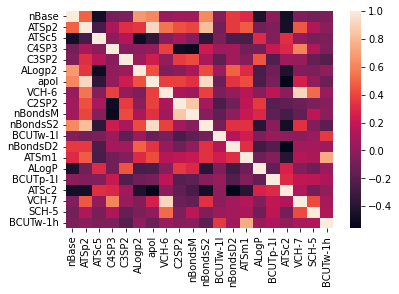

In [71]:
sns.heatmap(molecular_des.iloc[:,feature_rank[:20]].corr())

<AxesSubplot:xlabel='importance', ylabel='feature'>

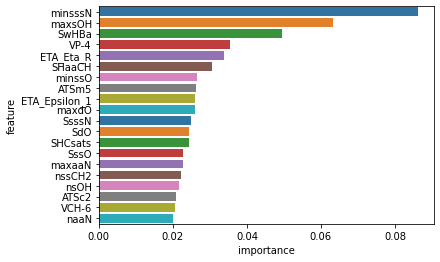

In [74]:
f_importance = pd.DataFrame({"feature": molecular_des_corr_del.columns,"importance":total_importance})
f_importance = f_importance.sort_values(by="importance", ascending=False)
f_importance = f_importance[:20]
sns.barplot(x="importance", y="feature", data=f_importance,
            order=f_importance["feature"],orient="h",palette=sns.color_palette("tab10", 20))
# plt.show()

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNet,Lasso
from deepforest import CascadeForestRegressor

In [77]:
###划分数据集###
X_train_df, X_test_df= train_test_split(molecular_des_corr_del,test_size=0.3, random_state=56)
train_df = X_train_df.join(era_activity)
test_df = X_test_df.join(era_activity)
X_train = train_df.iloc[:,:-2].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-2].values
y_test = test_df.iloc[:,-1].values

rs = StandardScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)
X_test = rs.transform(X_test)


X_train_filter = X_train[:,feature_rank[:20]]
X_test_filter = X_test[:,feature_rank[:20]]

names = ["KNeighborsRegressor", "RBF SVR",
         "RandomForestRegressor","GradientBoostingRegressor", "AdaBoostRegressor","CascadeForestRegressor","ElasticNet"]

classifiers = [
    KNeighborsRegressor(),
    SVR(kernel="rbf"),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=200),
    AdaBoostRegressor(),
    CascadeForestRegressor(),
    ElasticNet()
    ]


regressor_df = pd.DataFrame(index = names,columns=['MSE','R2'])

for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train_filter, y_train)
    y_pred = clf.predict(X_test_filter)
    MSE = mean_absolute_error(y_pred,y_test)
    R2 = r2_score(y_test,y_pred)
    regressor_df.loc[name]['MSE']=MSE
    regressor_df.loc[name]['R2'] = R2

regressor_df

---start	KNeighborsRegressor	----
---start	RBF SVR	----
---start	RandomForestRegressor	----
---start	GradientBoostingRegressor	----
---start	AdaBoostRegressor	----
---start	CascadeForestRegressor	----
[2021-10-15 02:28:38.809] Start to fit the model:
[2021-10-15 02:28:38.810] Fitting cascade layer = 0 
[2021-10-15 02:28:40.037] layer = 0  | Val MSE = 0.57670 | Elapsed = 1.227 s
[2021-10-15 02:28:40.040] Fitting cascade layer = 1 
[2021-10-15 02:28:41.227] layer = 1  | Val MSE = 0.54582 | Elapsed = 1.186 s
[2021-10-15 02:28:41.230] Fitting cascade layer = 2 
[2021-10-15 02:28:42.430] layer = 2  | Val MSE = 0.55385 | Elapsed = 1.200 s
[2021-10-15 02:28:42.430] Early stopping counter: 1 out of 2
[2021-10-15 02:28:42.434] Fitting cascade layer = 3 
[2021-10-15 02:28:43.619] layer = 3  | Val MSE = 0.57278 | Elapsed = 1.185 s
[2021-10-15 02:28:43.619] Early stopping counter: 2 out of 2
[2021-10-15 02:28:43.619] Handling early stopping
[2021-10-15 02:28:43.620] The optimal number of layers: 2

,MSE,R2
KNeighborsRegressor,0.591183,0.689518
RBF SVR,0.617993,0.665976
RandomForestRegressor,0.596171,0.693043
GradientBoostingRegressor,0.63266,0.656364
AdaBoostRegressor,0.82558,0.507921
CascadeForestRegressor,0.539037,0.739741
ElasticNet,1.10521,0.118713


In [78]:
#############   feature_rank
print(regressor_df['MSE'].mean())
print(regressor_df['R2'].mean())

0.7011196993106196
0.5816106313583745
